In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [19]:
df = pd.read_csv(r'/kaggle/input/3sec-features/3sec_features.csv')
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,actual_multi_genre
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170,"Rock, Pop"
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550,"Rock, Pop"
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777,"Rock, Pop"
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656,"Rock, Pop"
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913,"Rock, Pop"


In [20]:
rows = df.shape[0]
cols = df.shape[1]
print(f"Rows are: {rows} and columns are {cols}")

Rows are: 24620 and columns are 60


In [21]:
features = df.iloc[:,2:59]
features

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.797800,1579.811905,172801.64380,2326.916174,1.133194e+06,...,-0.529794,32.417294,7.014239,27.476717,-1.217601,28.785315,0.618297,26.961672,-7.396918,28.644170
1,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.278400,1593.324615,294182.07410,2458.027608,2.191394e+06,...,-6.527108,27.733225,-1.383345,39.802162,-5.495392,36.830288,7.911010,34.455340,3.651210,35.311550
2,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.625200,1558.870991,152172.72120,2239.286845,9.873727e+05,...,4.105564,30.249128,7.220845,25.881824,-2.801634,27.722574,2.708024,22.639078,-6.220536,39.085777
3,0.449659,0.073253,0.333232,0.003267,967.553472,120096.400100,1449.365069,161182.69100,1997.266945,9.988308e+05,...,-6.826433,31.660627,-2.379893,34.448370,-2.409710,41.797516,2.381857,44.143787,-10.076764,60.215656
4,0.406737,0.080221,0.327889,0.003120,959.808356,59398.279500,1426.996671,96487.01836,1878.834327,5.051104e+05,...,-2.525133,32.847797,3.834526,23.280157,-3.457653,32.983295,2.285278,20.172178,-6.665225,23.908913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24615,0.295226,0.094016,0.021039,0.000056,291.978067,10063.002590,611.850135,24364.56725,375.542388,5.932551e+04,...,4.876591,38.339024,5.372583,25.366219,1.952211,50.508247,-0.673771,79.792470,-5.530555,63.067703
24616,0.283132,0.083223,0.052595,0.000264,292.447448,1168.048694,262.158416,9734.02002,420.105310,5.018519e+03,...,-2.352866,22.237856,3.869124,25.358006,3.410983,40.967182,-2.775848,40.147373,-6.390646,55.431150
24617,0.240055,0.079368,0.045204,0.000315,306.645198,7032.938495,349.910501,23974.73184,463.296426,2.565619e+04,...,-6.420828,44.450710,-6.042143,48.116177,-4.489713,37.759995,-2.741151,33.541245,-1.366368,44.849674
24618,0.285041,0.085068,0.033291,0.000050,235.185748,4547.305221,232.738334,26629.64422,349.685916,1.492662e+04,...,-18.476357,16.999535,-14.717143,21.652325,-9.331166,25.001644,-9.926890,16.550720,-9.825608,11.176955


In [22]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your data to compute the mean and standard deviation
scaler.fit(features)

# Transform (normalize) your data
features = scaler.transform(features)

In [23]:
print(features)

[[-0.23778143 -0.56958284  1.39860879 ... -0.64350893 -0.78104998
  -0.60403813]
 [-0.2823771  -0.19301091  1.38597871 ... -0.405898    1.4735443
  -0.39272929]
 [ 0.69592554 -0.77372126  1.63751961 ... -0.78057072 -0.54098536
  -0.27311295]
 ...
 [-1.94678015 -0.06945085 -1.45868283 ... -0.43488233  0.44960593
  -0.09043814]
 [-1.50934026  0.3337232  -1.60835611 ... -0.97362175 -1.27667336
  -1.15762545]
 [-1.51104982  0.4774126  -1.46243548 ... -0.65832789 -1.6726923
  -0.4270052 ]]


In [24]:
genres = df['actual_multi_genre']
genres[342]

'Rock, Metal'

In [25]:
set_genre = set()
for i in genres:
    set_genre = set_genre.union(set((i.split(', '))))

# for genre in genres.split(','):
#     genre = genre.strip()  # Remove leading/trailing spaces
#     set_genre.add(genre)
actual_genre = list(set_genre)
print(*actual_genre,sep="\n")
print(f"The length is {len(actual_genre)}")

Rock
Bebop
Jazz
Punk
Classical
Rap & Hip-Hop
Country
R&B
Folk
Reggae
Pop
Metal
Dance & Electronic
Soul
Blues
The length is 15


In [26]:
for genre in actual_genre:
    df[genre] = 0  # Initialize all new columns with 0
def one_hot_encode(row):
    for genre in row['actual_multi_genre'].split(', '):
        if genre in actual_genre:
            row[genre] = 1
    return row

df = df.apply(one_hot_encode, axis=1)

In [27]:
df.drop('actual_multi_genre', axis=1,inplace=True)

In [28]:
df.head()

,name,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,Rap & Hip-Hop,Country,R&B,Folk,Reggae,Pop,Metal,Dance & Electronic,Soul,Blues
0,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.415807,0.072298,0.272616,0.003458,1071.405850,124830.7978,1579.811905,172801.64380,...,0,0,0,0,0,1,0,0,0,0
1,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.411221,0.077621,0.271611,0.004101,1091.232379,251883.2784,1593.324615,294182.07410,...,0,0,0,0,0,1,0,0,0,0
2,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.511829,0.069412,0.291631,0.003943,1051.140250,114751.6252,1558.870991,152172.72120,...,0,0,0,0,0,1,0,0,0,0
3,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.449659,0.073253,0.333232,0.003267,967.553472,120096.4001,1449.365069,161182.69100,...,0,0,0,0,0,1,0,0,0,0
4,/kaggle/input/3sec-finals/Split_folder_final/1...,132300,0.406737,0.080221,0.327889,0.003120,959.808356,59398.2795,1426.996671,96487.01836,...,0,0,0,0,0,1,0,0,0,0


In [29]:
labels = df.iloc[:,59:75]
print(*labels,sep="\n")
labels = labels.values
print(labels)

Rock
Bebop
Jazz
Punk
Classical
Rap & Hip-Hop
Country
R&B
Folk
Reggae
Pop
Metal
Dance & Electronic
Soul
Blues
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# SIMPLE NEURAL NETWORK - NO BATCH NORMALIZATION


In [31]:

from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam


n_features = 57
n_classes = 15
n_labels = 15
n_epochs = 50
random_state = 42
batch_size = 250
verbosity = 1
validation_split = 0.2

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=n_features))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

# Compile the model
model.compile(loss=binary_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=verbosity,
          validation_split=validation_split)

# Generate generalization metrics
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')


Epoch 1/50
53/53 [==============================] - 2s 16ms/step - loss: 0.3769 - accuracy: 0.1579 - val_loss: 0.2897 - val_accuracy: 0.2013
Epoch 2/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2804 - accuracy: 0.2491 - val_loss: 0.2752 - val_accuracy: 0.2567
Epoch 3/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2656 - accuracy: 0.2353 - val_loss: 0.2649 - val_accuracy: 0.2398
Epoch 4/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2530 - accuracy: 0.2401 - val_loss: 0.2576 - val_accuracy: 0.2489
Epoch 5/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2429 - accuracy: 0.2380 - val_loss: 0.2565 - val_accuracy: 0.2355
Epoch 6/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2327 - accuracy: 0.2402 - val_loss: 0.2459 - val_accuracy: 0.2289
Epoch 7/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2212 - accuracy: 0.2411 - val_loss: 0.2357 - val_accuracy: 0.2270
Epoch 8/50
53

Epoch 1/50
53/53 [==============================] - 1s 13ms/step - loss: 0.0164 - accuracy: 0.4298 - val_loss: 0.3524 - val_accuracy: 0.3547
Epoch 2/50
53/53 [==============================] - 1s 14ms/step - loss: 0.0121 - accuracy: 0.4385 - val_loss: 0.3404 - val_accuracy: 0.3607
Epoch 3/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0078 - accuracy: 0.4373 - val_loss: 0.3589 - val_accuracy: 0.3731
Epoch 4/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0060 - accuracy: 0.4381 - val_loss: 0.3515 - val_accuracy: 0.3656
Epoch 5/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0041 - accuracy: 0.4458 - val_loss: 0.3536 - val_accuracy: 0.3916
Epoch 6/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0047 - accuracy: 0.4412 - val_loss: 0.3673 - val_accuracy: 0.3898
Epoch 7/50
53/53 [==============================] - 1s 12ms/step - loss: 0.0049 - accuracy: 0.4428 - val_loss: 0.3751 - val_accuracy: 0.3513
Epoch 8/50
53

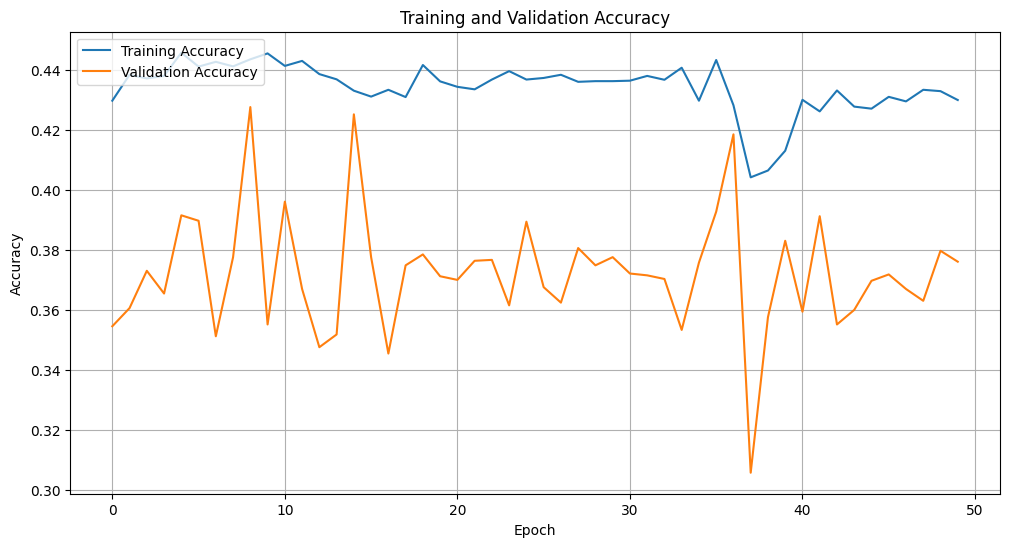

Test loss: 0.4054469168186188 / Test accuracy: 0.37907692790031433
254/254 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4329
           1       0.75      0.59      0.66       331
           2       0.80      0.71      0.75      1334
           3       0.81      0.75      0.78       696
           4       0.81      0.65      0.72       246
           5       0.88      0.79      0.83       652
           6       0.73      0.64      0.68       729
           7       0.79      0.71      0.75      1055
           8       0.73      0.65      0.69       871
           9       0.85      0.72      0.78       220
          10       0.97      0.98      0.97      7297
          11       0.86      0.74      0.80       883
          12       0.83      0.73      0.78      1291
          13       0.85      0.61      0.71       663
          14       0.79      0.66      0.72       899

   micro avg

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Fit data to model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=n_epochs,
                    verbose=verbosity,
                    validation_split=validation_split)

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Print classification report
report = classification_report(y_test, y_pred)
print(report)
